## Data cleaning, feature engineering, and modeling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/voter-survey-december16.csv')

In [3]:
pattern = '(imiss_).{1}(_2016)'
def return_imiss_cols(df):
    imiss_cols = []
    for col in df.columns:
        if re.search(pattern, col):
            imiss_cols.append(col)
    return imiss_cols

# issue column list
imiss_col_list = return_imiss_cols(df)

In [4]:
# target column list  
target_col_list = ['presvote16post_2016']
df_target = df[target_col_list]

In [5]:
df_issue = df[imiss_col_list].fillna(0)
df_issue['imiss_j_2016'].value_counts()#.isna().sum()

1.0    5947
2.0    1688
3.0     181
0.0     127
4.0      57
Name: imiss_j_2016, dtype: int64

In [6]:
df_issue = df_issue.astype(str)
df_issue = df_issue.join(df_target)

In [7]:
df_dummies = pd.get_dummies(df_issue)

In [8]:
df_dummies.corr()['presvote16post_2016'].abs().sort_values(ascending=False)

presvote16post_2016    1.000000
imiss_l_2016_1.0       0.304989
imiss_d_2016_1.0       0.286253
imiss_y_2016_1.0       0.267083
imiss_u_2016_1.0       0.254038
imiss_x_2016_1.0       0.240264
imiss_g_2016_1.0       0.230016
imiss_p_2016_1.0       0.226241
imiss_l_2016_4.0       0.212959
imiss_u_2016_3.0       0.192896
imiss_q_2016_1.0       0.185467
imiss_g_2016_4.0       0.182592
imiss_d_2016_3.0       0.179266
imiss_l_2016_3.0       0.178131
imiss_y_2016_4.0       0.176428
imiss_p_2016_3.0       0.155080
imiss_y_2016_3.0       0.153542
imiss_j_2016_1.0       0.147418
imiss_x_2016_3.0       0.144682
imiss_i_2016_1.0       0.140380
imiss_f_2016_1.0       0.137812
imiss_s_2016_1.0       0.135825
imiss_i_2016_3.0       0.135604
imiss_k_2016_1.0       0.133861
imiss_r_2016_1.0       0.132862
imiss_h_2016_1.0       0.129626
imiss_x_2016_4.0       0.123174
imiss_q_2016_3.0       0.120913
imiss_i_2016_4.0       0.120097
imiss_e_2016_1.0       0.119690
                         ...   
imiss_r_

In [9]:
df_dummies.shape

(8000, 116)

In [10]:
df_predictors = df_dummies.drop('presvote16post_2016', axis=1)

In [11]:
df_predictors.head()

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_0.0,imiss_x_2016_1.0,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## K means clustering

In [12]:
X = df_predictors

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [14]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
labels = k_means.labels_

In [16]:
y_pred = k_means.predict(X)

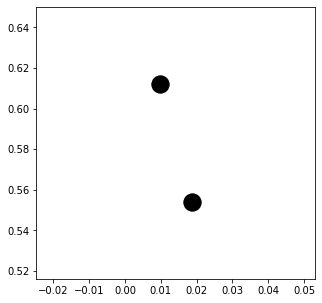

In [17]:
plt.figure(figsize=(5,5))
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=300)

In [18]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.09122755047749001

In [19]:
metrics.calinski_harabasz_score(X, labels)

836.4878129298589

In [20]:
df_target = df[target_col_list]
print(df_target.shape)
df_target_arr = np.ravel(df_target)

(8000, 1)


In [21]:
df_target_arr
y_pred.shape

(8000,)

In [22]:
dataset = pd.DataFrame({ 'y_pred': y_pred}, 
                        columns=[ 'y_pred']
                        )

In [23]:
dataset.head()

,y_pred
0,1
1,0
2,1
3,0
4,1


In [24]:
target_pred_df = df_predictors.join(df_target).join(dataset)
target_pred_df.head(10)

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0,presvote16post_2016,y_pred
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1.0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2.0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1.0,1
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,3.0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,2.0,1
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1
6,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1
7,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,2.0,0
8,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1.0,1
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1


In [25]:
# def count_correct():
#     for row in target_pred_df:
#         if (df.presvote16post_2016 == 1.0) and (df.y_pred ==1):
#             count += 1
#     print(count)

count = 0
for row in target_pred_df.itertuples():
    if (row.presvote16post_2016 == 2): #and (row.y_pred == 0):
        count +=1
print(count)


3479


In [26]:
2578/3545

0.7272214386459802

In [27]:
2795/3479

0.8033917792469101

## Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [109]:
X = df_predictors
y = df_target
X

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_0.0,imiss_x_2016_1.0,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [30]:
X.isna().sum().any()
y.isna().sum()

presvote16post_2016    394
dtype: int64

In [31]:
y = y.fillna(0)
y = np.ravel(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2, 
                                                    stratify=y)

In [65]:
lr = LogisticRegression(C=2, penalty='l2', 
                        solver='lbfgs', 
                        multi_class='auto', 
                        max_iter=1000)
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

In [66]:
df_target.columns

Index(['presvote16post_2016'], dtype='object')

In [67]:
cm = confusion_matrix(y_test, y_pred_test)
conf_matrix = pd.DataFrame(cm, index=['None','Clinton','Trump','Johnson','Stein','McMullin','Other','Did not vote'], 
                           columns=['Pred None','Pred Clinton','Pred Trump','Pred Johnson','Pred Stein','Pred McMullin','Pred Other','Pred Did Not Vote'])


conf_matrix

,Pred None,Pred Clinton,Pred Trump,Pred Johnson,Pred Stein,Pred McMullin,Pred Other,Pred Did Not Vote
None,2,42,33,1,0,0,1,0
Clinton,6,633,66,1,3,0,0,0
Trump,2,72,618,2,0,0,2,0
Johnson,0,16,24,3,1,0,2,0
Stein,0,21,1,0,0,0,0,0
McMullin,0,0,5,0,0,0,0,0
Other,0,19,17,0,0,0,0,0
Did not vote,1,3,3,0,0,0,0,0


In [68]:
# correct Clinton
correct = cm[1][1]
total = sum(cm[1])
pred_correct = correct/total
pred_correct

0.8928067700987306

In [69]:
# correct Trump
correct = cm[2][2]
total = sum(cm[2])
pred_correct = correct/total
pred_correct

0.8879310344827587

In [91]:
len(lr.coef_[1])

115

In [95]:
coef_dict = dict(zip(X.columns, lr.coef_[0]))
coef_dict

{'imiss_a_2016_0.0': 0.15892018496675953,
 'imiss_a_2016_1.0': 0.2800535266485483,
 'imiss_a_2016_2.0': 0.05665412500794775,
 'imiss_a_2016_3.0': -0.2548314378357848,
 'imiss_a_2016_4.0': -0.24230963898774982,
 'imiss_b_2016_0.0': -0.32552065170103334,
 'imiss_b_2016_1.0': -0.10637698622154529,
 'imiss_b_2016_2.0': 0.1818903626943378,
 'imiss_b_2016_3.0': 0.14841857503910133,
 'imiss_b_2016_4.0': 0.1000754599888285,
 'imiss_c_2016_0.0': 0.15563322726652476,
 'imiss_c_2016_1.0': 0.0013990498132730588,
 'imiss_c_2016_2.0': -0.49113721903052254,
 'imiss_c_2016_3.0': -0.11332563446544713,
 'imiss_c_2016_4.0': 0.4459173362158763,
 'imiss_d_2016_0.0': -0.6556865512027238,
 'imiss_d_2016_1.0': 0.539403215628752,
 'imiss_d_2016_2.0': 0.11798772113918476,
 'imiss_d_2016_3.0': -0.0470763130976833,
 'imiss_d_2016_4.0': 0.043858687332133786,
 'imiss_e_2016_0.0': -0.06913626930224821,
 'imiss_e_2016_1.0': -0.3037484221753039,
 'imiss_e_2016_2.0': 0.056371117667450114,
 'imiss_e_2016_3.0': 0.0738505

In [100]:
from sklearn.feature_selection import RFE
predictors = X_train
selector = RFE(lr, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [117]:
len(X_train.columns)

115

In [106]:
order = selector.ranking_
len(order)
order

array([ 39,  64,  98,  52,  81,  66,  72,  75,  22,  19,  87,  50,  49,
        30,  23,  16,  51, 109, 108,  83,  45,  14, 114,  60,  59,  90,
        21,  78,   4,   3,  53,  71,  96, 115,  32,  44,  74,  86, 102,
        18,  41,  55,  91,  94,  48,  65,  26,  73,  15,  10,  38,  36,
       100,  99,  12,  25,   2,  82,  27,   1,  37,  97, 105,   8,   9,
        40,  54, 112,  84,  63,  43,  68, 111,  46,  29,  67,  42,  31,
        92,  61,  70,  34,  89,  62, 110,  28,  85, 101,  47,  13,  88,
        76,  77, 106,  11,  79,  33, 103, 104,  24,  58,  35, 107,   7,
         6,  93,  17, 113,  69,  20,  56,  57,  80,  95,   5])

In [123]:
df_predictors.columns

Index(['imiss_a_2016_0.0', 'imiss_a_2016_1.0', 'imiss_a_2016_2.0',
       'imiss_a_2016_3.0', 'imiss_a_2016_4.0', 'imiss_b_2016_0.0',
       'imiss_b_2016_1.0', 'imiss_b_2016_2.0', 'imiss_b_2016_3.0',
       'imiss_b_2016_4.0',
       ...
       'imiss_x_2016_0.0', 'imiss_x_2016_1.0', 'imiss_x_2016_2.0',
       'imiss_x_2016_3.0', 'imiss_x_2016_4.0', 'imiss_y_2016_0.0',
       'imiss_y_2016_1.0', 'imiss_y_2016_2.0', 'imiss_y_2016_3.0',
       'imiss_y_2016_4.0'],
      dtype='object', length=115)

In [137]:
for i in df_predictors.index:
    rank = np.array(order)
    feat = np.array(df_predictors.columns)
    

39 imiss_a_2016_0.0
64 imiss_a_2016_1.0
98 imiss_a_2016_2.0
52 imiss_a_2016_3.0
81 imiss_a_2016_4.0
66 imiss_b_2016_0.0
72 imiss_b_2016_1.0
75 imiss_b_2016_2.0
22 imiss_b_2016_3.0
19 imiss_b_2016_4.0
87 imiss_c_2016_0.0
50 imiss_c_2016_1.0
49 imiss_c_2016_2.0
30 imiss_c_2016_3.0
23 imiss_c_2016_4.0
16 imiss_d_2016_0.0
51 imiss_d_2016_1.0
109 imiss_d_2016_2.0
108 imiss_d_2016_3.0
83 imiss_d_2016_4.0
45 imiss_e_2016_0.0
14 imiss_e_2016_1.0
114 imiss_e_2016_2.0
60 imiss_e_2016_3.0
59 imiss_e_2016_4.0
90 imiss_f_2016_0.0
21 imiss_f_2016_1.0
78 imiss_f_2016_2.0
4 imiss_f_2016_3.0
3 imiss_f_2016_4.0
53 imiss_g_2016_0.0
71 imiss_g_2016_1.0
96 imiss_g_2016_2.0
115 imiss_g_2016_3.0
32 imiss_g_2016_4.0
44 imiss_h_2016_0.0
74 imiss_h_2016_1.0
86 imiss_h_2016_2.0
102 imiss_h_2016_3.0
18 imiss_h_2016_4.0
41 imiss_i_2016_0.0
55 imiss_i_2016_1.0
91 imiss_i_2016_2.0
94 imiss_i_2016_3.0
48 imiss_i_2016_4.0
65 imiss_j_2016_0.0
26 imiss_j_2016_1.0
73 imiss_j_2016_2.0
15 imiss_j_2016_3.0
10 imiss_j_2016_4

IndexError: index 115 is out of bounds for axis 0 with size 115